![title](https://doity.com.br/media/doity/eventos/evento-20025-logo_organizador.png)

# Prova de Descoberta do Conhecimento

* **Prof. Cleilton Lima Rocha**
* **emails:** climarocha@gmail.com
* **deadline: 11/10/2021**

Para este projeto exploraremos os dados **Call_Data.csv** disponível na pasta.


Para facilitar a administração da segurança pública, o Departamento de Polícia de Seattle dividiu a cidade em 5 partes, cada uma com uma delegacia. Cada delegacia foi subdividida em setores, e estes foram divididos em beats (hondas). A administração tem um dataset chamado Call_Data, para obter maiores informações acesse este [link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy).

O objetivo do nosso projeto é apoiar os policiais quanto as medidas prescritivas que eles devem tomar ao tentarem resolver uma chamada. Para isto eles têm disponível o histórico de tudo o que já foi resolvido, por ele e por seus colegas, e sua solução de Data Science capaz de prever a variável alvo da nossa prova será **Event Clearance Description**.

Boa prova e hands on!

**PS.:**
* Quando houver necessidade de splitar os dados aplique a proporção 70 para treino e 30 para teste
* Quando houver necessidade de utilizar o random_state defina o valor 100
* O título do email deve ser "Prova KDD - Turma 8 - [Membros da equipe]"
* Envie o código fonte e o report (File ==> Download As ==> Html ou PDF), com o nome dos membros da equipe, para meu email, climarocha@gmail.com até o dia **11/10/2021**.

# Prova KDD - Turma 8 - Lucas Belmino, Roberto Morel, Vinicius Gomes, Alexandre Azevedo

#### Tamanho do DataSet

In [1]:
# Para rodar com o tamanho grande trocar a variável para --> False
small_size = False

#### Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 150

from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
import nltk
nltk.download(['punkt', 'wordnet'])
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [5]:
import plotly.express as px
import matplotlib.pyplot as plt

#### Visualizando o Conjunto de Dados

In [6]:
call_data = pd.read_csv('Call_Data.csv')
del call_data['Unnamed: 0']

call_data.sample()

CAD Event Number               Event Clearance Description  \
9385     2009000214334  UNABLE TO LOCATE INCIDENT OR COMPLAINANT   

                     Call Type  Priority  \
9385  TELEPHONE OTHER, NOT 911         1   

                                  Initial Call Type  \
9385  UNKNOWN - ANI/ALI - PAY PHNS (INCL OPEN LINE)   

                               Final Call Type    Original Time Queued  \
9385  --ASSIST PUBLIC - 911 HANG UP, OPEN LINE  06/21/2009 01:01:45 AM   

                    Arrived Time Precinct Sector Beat  
9385  Jun 21 2009 01:10:33:000AM     WEST   MARY   M1

# Questões

**1. Importe o data set *call_data.csv* e considere a variável alvo 'Event Clearance Description'(0,5 pontos)** 
    
- 1.1. Como está o balanceamento das classes?

    - P.S.: Não é obrigatório aplicar o undersampling and oversampling sobre o dataset

    - P.S.: Se desejar você pode usar o dataset **call_data_small.csv** apenas pra agilizar o desenvolvimento no final tudo deve ser realizado com o **call_data.csv**

In [7]:
call_data['Event Clearance Description'].unique()

array(['CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)',
       'PROBLEM SOLVING PROJECT',
       'UNABLE TO LOCATE INCIDENT OR COMPLAINANT',
       'REPORT WRITTEN (NO ARREST)', 'ORAL WARNING GIVEN',
       'FALSE COMPLAINT/UNFOUNDED', 'PHYSICAL ARREST MADE'], dtype=object)

In [8]:
fig = px.pie(
    call_data['Event Clearance Description'].value_counts().reset_index(),
    values= 'Event Clearance Description',
    names= 'index',
    title= 'Event Clearance Description'
)

fig.show()

**2. Realize o EDA que você julgar necessário (análise exploratória dos dados), o objetivo do EDA é mostrar alguns insights sobre os dados (1,0 pontos)**
   * PS.: Utilize recursos visuais, por exemplo gráficos

In [9]:
print('No Rows:', call_data.shape[0])
print('No Columns:', call_data.shape[1])

No Rows: 232442
No Columns: 11


#### Dados gerais de número de colunas nulas, vazias e a quantidade de valores únicos

In [10]:
col_dict = {}

for col in call_data.columns:
    col_dict[str(col)] = {}
    col_dict[str(col)]['No Nulls'] = call_data[col].isnull().sum()
    col_dict[str(col)]['No Empty'] = (call_data[col] == '').sum()
    col_dict[str(col)]['No UNKNOWN'] = (call_data[col] == 'UNKNOWN').sum()
    col_dict[str(col)]['No Uniques'] = len(call_data[col].unique())
    col_dict[str(col)]['Uniques'] = call_data[col].sort_values().unique()

col_dict = pd.DataFrame.from_dict(col_dict).T

col_dict

D:\Programas\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



No Nulls No Empty No UNKNOWN No Uniques  \
CAD Event Number                   0        0          0     232442   
Event Clearance Description        0        0          0          7   
Call Type                          0        0          0          9   
Priority                           0        0          0          9   
Initial Call Type                  0        0          0        238   
Final Call Type                    0        0          0        317   
Original Time Queued               0        0          0     231776   
Arrived Time                       0        0          0     217201   
Precinct                           0        0       1550          6   
Sector                          1550        0          0         18   
Beat                               0        0          0         89   

                                                                       Uniques  
CAD Event Number             [2009000189336, 2009000189340, 2009000189344, ...  
Event Clearance Description  [CITATION ISSUED (CRIMINAL OR NON-CRIMINAL), F...  
Call Type                    [911, ALARM CALL (NOT POLICE ALARM), HISTORY C...  
Priority                                           [1, 2, 3, 4, 5, 6, 7, 8, 9]  
Initial Call Type            [--BURGLARY - NON RESIDENTIAL/COMMERCIAL, --FR...  
Final Call Type              [--ALARM-COMM (INC BANK, ATM, SCHOOLS, BSN), -...  
Original Time Queued         [01/01/2010 01:01:19 AM, 01/01/2010 01:02:54 A...  
Arrived Time                 [Apr  1 2010 01:00:18:000AM, Apr  1 2010 01:00...  
Precinct                        [EAST, NORTH, SOUTH, SOUTHWEST, UNKNOWN, WEST]  
Sector                       [BOY, CHARLIE, DAVID, EDWARD, FRANK, GEORGE, J...  
Beat                         [99, B1, B2, B3, BS, C1, C2, C3, CC, CCD, CDD,...

# CAD Event Number

O número de valores únicos na coluna identificadora ('CAD Event Number') é realmente único e igual ao número de linhas.

In [11]:
len(call_data['CAD Event Number'].unique())

232442

In [12]:
call_data.shape[0]

232442

# Precinct

Observando os valores únicos foi visto que a coluna de delegacias tem 6 valores únicos, no entanto só há 5 delegacias na cidade. Vamos ver quais são esses valores:

In [13]:
call_data['Precinct'].unique()

array(['WEST', 'NORTH', 'SOUTH', 'SOUTHWEST', 'EAST', 'UNKNOWN'],
      dtype=object)

A um valor denominado 'UNKNOWN', ou desconhecido, isso então representa a falta de informação ou valor nulo e deve ser tratado.

Além disso, observa-se que o número de celulas com o valor 'UNKNOWN' é igual a número de valores nulos na coluna Setor. Vamos conferir se todos os valores nulos se 'Setor' são em Delegacias igual a 'UNKNOWN'.

In [14]:
call_data[call_data['Precinct'] == 'UNKNOWN'].Sector.unique()

array([nan], dtype=object)

#### Vamos observar o número de chamadas por Delegacia, Setor e Rota

In [15]:
call_data.groupby(['Precinct', 'Sector', 'Beat'])['CAD Event Number'].count().reset_index()

Precinct   Sector Beat  CAD Event Number
0        EAST  CHARLIE   C1              3242
1        EAST  CHARLIE   C2              2913
2        EAST  CHARLIE   C3              3890
3        EAST   EDWARD   E1              4843
4        EAST   EDWARD   E2              5890
5        EAST   EDWARD   E3              5386
6        EAST   GEORGE   G1              3148
7        EAST   GEORGE   G2              4670
8        EAST   GEORGE   G3              3182
9       NORTH      BOY   B1              4611
10      NORTH      BOY   B2              5740
11      NORTH      BOY   B3              5027
12      NORTH     JOHN   J1              3461
13      NORTH     JOHN   J2              3163
14      NORTH     JOHN   J3              3688
15      NORTH  LINCOLN   L1              3486
16      NORTH  LINCOLN   L2              3681
17      NORTH  LINCOLN   L3              3978
18      NORTH     NORA   N1              2849
19      NORTH     NORA   N2              3730
20      NORTH     NORA   N3              5001
21      NORTH    UNION   U1              5343
22      NORTH    UNION   U2              4636
23      NORTH    UNION   U3              4281
24      SOUTH    OCEAN   O1              3120
25      SOUTH    OCEAN   O2              2310
26      SOUTH    OCEAN   O3              2598
27      SOUTH   ROBERT   R1              5525
28      SOUTH   ROBERT   R2              6100
29      SOUTH   ROBERT   R3              6016
30      SOUTH      SAM   S1              4659
31      SOUTH      SAM   S2              5980
32      SOUTH      SAM   S3              4775
33  SOUTHWEST    FRANK   F1              3703
34  SOUTHWEST    FRANK   F2              2822
35  SOUTHWEST    FRANK   F3              3440
36  SOUTHWEST  WILLIAM   W1              5105
37  SOUTHWEST  WILLIAM   W2              3683
38  SOUTHWEST  WILLIAM   W3              3422
39       WEST    DAVID   D1              7953
40       WEST    DAVID   D2              6709
41       WEST    DAVID   D3              4045
42       WEST     KING   K1              5236
43       WEST     KING   K2              5989
44       WEST     KING   K3              8781
45       WEST     MARY   M1              5752
46       WEST     MARY   M2              4360
47       WEST     MARY   M3              5324
48       WEST    QUEEN   Q1              2910
49       WEST    QUEEN   Q2              4594
50       WEST    QUEEN   Q3              6142

Pela informação da tabela acima vemos que não há nenhum Setor ou Rota alocado em um Delegacia incorreto.

In [16]:
call_data.groupby(['Precinct'])['CAD Event Number'].count().reset_index(
).sort_values(by= 'CAD Event Number', ascending= False).head(5)

Precinct  CAD Event Number
5       WEST             67795
1      NORTH             62675
2      SOUTH             41083
0       EAST             37164
3  SOUTHWEST             22175

É observado que as Precincts que apresentam maior número de chamados são a Oeste e a Norte.

In [17]:
call_data.groupby(['Precinct', 'Sector'])['CAD Event Number'].count().reset_index(
).sort_values(by= 'CAD Event Number', ascending= False).head(5)

Precinct  Sector  CAD Event Number
14     WEST    KING             20006
13     WEST   DAVID             18707
9     SOUTH  ROBERT             17641
1      EAST  EDWARD             16119
15     WEST    MARY             15436

Já na visão por Setor, entre o top 5 há três Setor da Delegacias Oeste e dois da Delegacia Sul

#### Analisando valores incorretos

In [18]:
call_data.fillna('Nulo').groupby(['Precinct', 'Sector', 'Beat'])['CAD Event Number'].count().reset_index()

Precinct   Sector    Beat  CAD Event Number
0         EAST  CHARLIE      C1              3242
1         EAST  CHARLIE      C2              2913
2         EAST  CHARLIE      C3              3890
3         EAST   EDWARD      E1              4843
4         EAST   EDWARD      E2              5890
5         EAST   EDWARD      E3              5386
6         EAST   GEORGE      G1              3148
7         EAST   GEORGE      G2              4670
8         EAST   GEORGE      G3              3182
9        NORTH      BOY      B1              4611
10       NORTH      BOY      B2              5740
11       NORTH      BOY      B3              5027
12       NORTH     JOHN      J1              3461
13       NORTH     JOHN      J2              3163
14       NORTH     JOHN      J3              3688
15       NORTH  LINCOLN      L1              3486
16       NORTH  LINCOLN      L2              3681
17       NORTH  LINCOLN      L3              3978
18       NORTH     NORA      N1              2849
19       NORTH     NORA      N2              3730
20       NORTH     NORA      N3              5001
21       NORTH    UNION      U1              5343
22       NORTH    UNION      U2              4636
23       NORTH    UNION      U3              4281
24       SOUTH    OCEAN      O1              3120
25       SOUTH    OCEAN      O2              2310
26       SOUTH    OCEAN      O3              2598
27       SOUTH   ROBERT      R1              5525
28       SOUTH   ROBERT      R2              6100
29       SOUTH   ROBERT      R3              6016
30       SOUTH      SAM      S1              4659
31       SOUTH      SAM      S2              5980
32       SOUTH      SAM      S3              4775
33   SOUTHWEST    FRANK      F1              3703
34   SOUTHWEST    FRANK      F2              2822
35   SOUTHWEST    FRANK      F3              3440
36   SOUTHWEST  WILLIAM      W1              5105
37   SOUTHWEST  WILLIAM      W2              3683
38   SOUTHWEST  WILLIAM      W3              3422
39     UNKNOWN     Nulo      99               489
40     UNKNOWN     Nulo      B1                 2
41     UNKNOWN     Nulo      B2                 2
42     UNKNOWN     Nulo      B3                 7
43     UNKNOWN     Nulo      BS                 4
44     UNKNOWN     Nulo      C1                17
45     UNKNOWN     Nulo      C2                75
46     UNKNOWN     Nulo      C3                 5
47     UNKNOWN     Nulo      CC                 1
48     UNKNOWN     Nulo     CCD                 1
49     UNKNOWN     Nulo     CDD                 4
50     UNKNOWN     Nulo    COMM                 3
51     UNKNOWN     Nulo      CS                 1
52     UNKNOWN     Nulo     CTY                42
53     UNKNOWN     Nulo      D1                 1
54     UNKNOWN     Nulo      D2                 1
55     UNKNOWN     Nulo      D3                 4
56     UNKNOWN     Nulo     DET                46
57     UNKNOWN     Nulo      DS                 3
58     UNKNOWN     Nulo       E                47
59     UNKNOWN     Nulo      E1                48
60     UNKNOWN     Nulo      E2                13
61     UNKNOWN     Nulo      E3                 7
62     UNKNOWN     Nulo      ES                22
63     UNKNOWN     Nulo      F1                 5
64     UNKNOWN     Nulo      F2                 1
65     UNKNOWN     Nulo      F3                 1
66     UNKNOWN     Nulo      FS                 1
67     UNKNOWN     Nulo      G1                19
68     UNKNOWN     Nulo      G2                 3
69     UNKNOWN     Nulo      G3                 1
70     UNKNOWN     Nulo      H3                 1
71     UNKNOWN     Nulo  HARBOR                 1
72     UNKNOWN     Nulo      HS                 7
73     UNKNOWN     Nulo     INV                42
74     UNKNOWN     Nulo      J1                11
75     UNKNOWN     Nulo      J2                 6
76     UNKNOWN     Nulo      J3                 6
77     UNKNOWN     Nulo      JS                 6
78     UNKNOWN     Nulo      K1                 6
79    

Analisando os valores incorretos vemos que, através da rota, podemos corrigir a delegacia e o setor.

In [19]:
list_beats = call_data.groupby(['Precinct', 'Sector'])['Beat'].unique().reset_index()

In [20]:
for i in range(list_beats.shape[0]):
    call_data.loc[call_data.Beat.isin(list_beats.iloc[i,:].Beat), 'Precinct'] = list_beats.iloc[i,:].Precinct
    call_data.loc[call_data.Beat.isin(list_beats.iloc[i,:].Beat), 'Sector'] = list_beats.iloc[i,:].Sector

In [21]:
call_data.fillna('Nulo').groupby(['Precinct', 'Sector', 'Beat'])['CAD Event Number'].count().reset_index()

Precinct   Sector    Beat  CAD Event Number
0        EAST  CHARLIE      C1              3259
1        EAST  CHARLIE      C2              2988
2        EAST  CHARLIE      C3              3895
3        EAST   EDWARD      E1              4891
4        EAST   EDWARD      E2              5903
5        EAST   EDWARD      E3              5393
6        EAST   GEORGE      G1              3167
7        EAST   GEORGE      G2              4673
8        EAST   GEORGE      G3              3183
9       NORTH      BOY      B1              4613
10      NORTH      BOY      B2              5742
11      NORTH      BOY      B3              5034
12      NORTH     JOHN      J1              3472
13      NORTH     JOHN      J2              3169
14      NORTH     JOHN      J3              3694
15      NORTH  LINCOLN      L1              3488
16      NORTH  LINCOLN      L2              3684
17      NORTH  LINCOLN      L3              3993
18      NORTH     NORA      N1              2850
19      NORTH     NORA      N2              3731
20      NORTH     NORA      N3              5002
21      NORTH    UNION      U1              5344
22      NORTH    UNION      U2              4637
23      NORTH    UNION      U3              4283
24      SOUTH    OCEAN      O1              3123
25      SOUTH    OCEAN      O2              2322
26      SOUTH    OCEAN      O3              2602
27      SOUTH   ROBERT      R1              5528
28      SOUTH   ROBERT      R2              6104
29      SOUTH   ROBERT      R3              6019
30      SOUTH      SAM      S1              4668
31      SOUTH      SAM      S2              5984
32      SOUTH      SAM      S3              4780
33  SOUTHWEST    FRANK      F1              3708
34  SOUTHWEST    FRANK      F2              2823
35  SOUTHWEST    FRANK      F3              3441
36  SOUTHWEST  WILLIAM      W1              5126
37  SOUTHWEST  WILLIAM      W2              3720
38  SOUTHWEST  WILLIAM      W3              3432
39    UNKNOWN     Nulo      99               489
40    UNKNOWN     Nulo      BS                 4
41    UNKNOWN     Nulo      CC                 1
42    UNKNOWN     Nulo     CCD                 1
43    UNKNOWN     Nulo     CDD                 4
44    UNKNOWN     Nulo    COMM                 3
45    UNKNOWN     Nulo      CS                 1
46    UNKNOWN     Nulo     CTY                42
47    UNKNOWN     Nulo     DET                46
48    UNKNOWN     Nulo      DS                 3
49    UNKNOWN     Nulo       E                47
50    UNKNOWN     Nulo      ES                22
51    UNKNOWN     Nulo      FS                 1
52    UNKNOWN     Nulo      H3                 1
53    UNKNOWN     Nulo  HARBOR                 1
54    UNKNOWN     Nulo      HS                 7
55    UNKNOWN     Nulo     INV                42
56    UNKNOWN     Nulo      JS                 6
57    UNKNOWN     Nulo      KS                 7
58    UNKNOWN     Nulo    LAPT                15
59    UNKNOWN     Nulo      MS                10
60    UNKNOWN     Nulo       N                45
61    UNKNOWN     Nulo      NS                 7
62    UNKNOWN     Nulo     ODD                 2
63    UNKNOWN     Nulo      OS                 1
64    UNKNOWN     Nulo      P1                 1
65    UNKNOWN     Nulo      QS                 4
66    UNKNOWN     Nulo      RS                 2
67    UNKNOWN     Nulo       S               119
68    UNKNOWN     Nulo     SEA                 1
69    UNKNOWN     Nulo     SEI                 4
70    UNKNOWN     Nulo      SS                14
71    UNKNOWN     Nulo     SWT                 5
72    UNKNOWN     Nulo      TQ                 1
73    UNKNOWN     Nulo     TRF                 5
74    UNKNOWN     Nulo      US                14
75    UNKNOWN     Nulo       W                29
76    UNKNOWN     Nulo      WS                15
77       WEST    DAVID      D1              7954
78       WEST    DAVID      D2              6710
79       WEST    DAVID      D3              4049
80       WEST     KING      K1      

In [22]:
print('No de Delegacias com o UNKNOWN:', (call_data['Precinct'] == 'UNKNOWN').sum())

No de Delegacias com o UNKNOWN: 1022


Reduzimos o número de Delegacias sem informação de **1550** para **1022**.

In [23]:
call_data = call_data[call_data['Precinct'] != 'UNKNOWN']

# Sector

In [24]:
fig = px.pie(
    call_data.groupby(['Sector'])['CAD Event Number'].count().reset_index(),
    values= 'CAD Event Number',
    names= 'Sector',
    title= 'Sector'
)

fig.show()

Não concentração em nenhum setor na cidade

# Beats

In [25]:
fig = px.pie(
    call_data.groupby(['Beat'])['CAD Event Number'].count().reset_index(),
    values= 'CAD Event Number',
    names= 'Beat',
    title= 'Beat'
)

fig.show()

Não há nenhuma concentração de chamados em nehuma honda

# Call Type

#### Analisando o tipo de chamada (Call Type)

In [26]:
call_data.groupby(['Call Type'])['CAD Event Number'].count().reset_index()

Call Type  CAD Event Number
0                            911             63717
1  ALARM CALL (NOT POLICE ALARM)              8835
2           HISTORY CALL (RETRO)                 3
3            IN PERSON COMPLAINT                 5
4                         ONVIEW             89525
5           POLICE (VARDA) ALARM                11
6  PROACTIVE (OFFICER INITIATED)                 6
7    SCHEDULED EVENT (RECURRING)                 1
8       TELEPHONE OTHER, NOT 911             69317

In [27]:
fig = px.pie(
    call_data.groupby(['Call Type'])['CAD Event Number'].count().reset_index(),
    values= 'CAD Event Number',
    names= 'Call Type',
    title= 'Call Type'
)

fig.show()

Observa-se que a diversas formas de criar um chamado mas que as principais formas de acionamento são através de ligações diretas, ligações para terceiros e flagrante.

#### Criando as colunas categorizadas (One-Hot Enconding)

O OHE será realizado nas 3 categorias de maior destaque e os outros serão agrupadas em uma quarta categoria

In [28]:
top_call_type = call_data.groupby(['Call Type'])['CAD Event Number'].count().sort_values(ascending= False).reset_index(
).head(3)['Call Type'].unique()

for col in top_call_type:
    call_data['Call Type ' + col] = (call_data['Call Type'] == col).astype(int)

call_data['Call Type OUTROS'] = (~call_data['Call Type'].isin(top_call_type)).astype(int)

In [29]:
call_data.columns

Index(['CAD Event Number', 'Event Clearance Description', 'Call Type',
       'Priority', 'Initial Call Type', 'Final Call Type',
       'Original Time Queued', 'Arrived Time', 'Precinct', 'Sector', 'Beat',
       'Call Type ONVIEW', 'Call Type TELEPHONE OTHER, NOT 911',
       'Call Type 911', 'Call Type OUTROS'],
      dtype='object')

In [30]:
call_data[['CAD Event Number', 'Call Type', 'Call Type ONVIEW',
       'Call Type TELEPHONE OTHER, NOT 911', 'Call Type 911', 'Call Type OUTROS']].sample(10)

CAD Event Number                      Call Type  Call Type ONVIEW  \
196656     2010000244052  ALARM CALL (NOT POLICE ALARM)                 0   
129020     2010000070257                         ONVIEW                 1   
86851      2009000414102                         ONVIEW                 1   
193533     2010000236276       TELEPHONE OTHER, NOT 911                 0   
167762     2010000169063                         ONVIEW                 1   
173730     2010000184704                         ONVIEW                 1   
103607     2010000007952                            911                 0   
209721     2010000277319                         ONVIEW                 1   
173902     2010000185207       TELEPHONE OTHER, NOT 911                 0   
144954     2010000110618       TELEPHONE OTHER, NOT 911                 0   

        Call Type TELEPHONE OTHER, NOT 911  Call Type 911  Call Type OUTROS  
196656                                   0              0                 1  
129020                                   0              0                 0  
86851                                    0              0                 0  
193533                                   1              0                 0  
167762                                   0              0                 0  
173730                                   0              0                 0  
103607                                   0              1                 0  
209721                                   0              0                 0  
173902                                   1              0                 0  
144954                                   1              0                 0

# Original Time Queued and Arrived Time

#### Corrigindo formato

In [31]:
dt_format = '%m/%d/%Y %I:%M:%S %p'
call_data['Original Time Queued'] = pd.to_datetime(call_data['Original Time Queued'], format= dt_format)

In [32]:
dt_format = '%b %d %Y %I:%M:%S:%f%p'
call_data['Arrived Time'] = pd.to_datetime(call_data['Arrived Time'], format= dt_format)

#### Criando variáveis de tempo

In [33]:
call_data['Original Time Queued Month'] = call_data['Original Time Queued'].dt.month
call_data['Original Time Queued Day'] = call_data['Original Time Queued'].dt.day
call_data['Original Time Queued Hour'] = call_data['Original Time Queued'].dt.hour
call_data['Original Time Queued DayOfWeek'] = call_data['Original Time Queued'].dt.dayofweek
call_data['Original Time Queued WeekOfYear'] = call_data['Original Time Queued'].dt.weekofyear

call_data['Time to Arrive Hours'] = (call_data['Arrived Time'] - call_data['Original Time Queued']).dt.total_seconds()/3600

#### Corrigindo variável de tempo de chegada

A variavel de hora da chegada tem valores vazios. Logo foram criadas duas colunas, na original, o tempo de chegada foi considerado zero quando não havia a informação, na coluna com "Fix" foi substituido os valores diferentes por valores igual a média do **Priority**.

In [34]:
time_arrive_mean = call_data[call_data['Time to Arrive Hours'] > 0].groupby('Priority')['Time to Arrive Hours'].mean()
call_data['Time to Arrive Hours Fix'] = call_data['Time to Arrive Hours']

for id_priority in call_data[call_data['Time to Arrive Hours'] < 0]['Priority'].unique():
    call_data.loc[(call_data['Time to Arrive Hours'] < 0) & (call_data['Priority'] == id_priority), 'Time to Arrive Hours Fix'] = time_arrive_mean.loc[id_priority]

call_data.loc[(call_data['Time to Arrive Hours'] < 0), 'Time to Arrive Hours'] = 0

# Initial Call Type

#### Analisando o tipo de chamada (Initial Call Type)

In [35]:
call_data.groupby(['Initial Call Type'])['CAD Event Number'].count().sort_values(ascending= False).reset_index(
).head(10)['CAD Event Number'].sum()

122956

In [36]:
call_data.groupby(['Initial Call Type'])['CAD Event Number'].count().sort_values(ascending= False).reset_index(
).head(20)['CAD Event Number'].sum()/call_data.shape[0]

0.686414311641172

Observa-se que o top 10 motivos iniciais de ligação são responsáveis por mais de 50% dos chamados.

In [37]:
call_data.groupby(['Initial Call Type'])['CAD Event Number'].count().sort_values(ascending= False).reset_index(
).head(5)['CAD Event Number'].sum()

91090

In [38]:
call_data.groupby(['Initial Call Type'])['CAD Event Number'].count().sort_values(ascending= False).reset_index(
).head(5)['CAD Event Number'].sum()/call_data.shape[0]

0.3936133437040878

Além disso o top 5 é responsável por cerca de 39% dos chamados. E esse são:

In [39]:
call_data.groupby(['Initial Call Type'])['CAD Event Number'].count().sort_values(ascending= False).reset_index(
).head(5)

Initial Call Type  CAD Event Number
0       TRAFFIC STOP - OFFICER INITIATED ONVIEW             27485
1    SUSPICIOUS STOP - OFFICER INITIATED ONVIEW             27324
2      PARKING VIOLATION (EXCEPT ABANDONED CAR)             17161
3  SECONDARY - THEFT (NOT SHOPLIFT OR SERVICES)             10078
4        SUSPICIOUS PERSON, VEHICLE OR INCIDENT              9042

In [40]:
top5_inicial_call_type = call_data.groupby(['Initial Call Type'])['CAD Event Number'].count().sort_values(ascending= False).reset_index(
).head(5)['Initial Call Type'].unique()

top5_inicial_call_type

array(['TRAFFIC STOP - OFFICER INITIATED ONVIEW',
       'SUSPICIOUS STOP - OFFICER INITIATED ONVIEW',
       'PARKING VIOLATION (EXCEPT ABANDONED CAR)',
       'SECONDARY - THEFT (NOT SHOPLIFT OR SERVICES)',
       'SUSPICIOUS PERSON, VEHICLE OR INCIDENT'], dtype=object)

In [41]:
call_data[call_data['Initial Call Type'].isin(top5_inicial_call_type)].groupby(['Priority', 'Initial Call Type']
                                                                              )['CAD Event Number'].count()

Priority  Initial Call Type                           
1         PARKING VIOLATION (EXCEPT ABANDONED CAR)           21
          SUSPICIOUS PERSON, VEHICLE OR INCIDENT            211
2         PARKING VIOLATION (EXCEPT ABANDONED CAR)           42
          SUSPICIOUS PERSON, VEHICLE OR INCIDENT           1803
3         PARKING VIOLATION (EXCEPT ABANDONED CAR)        15315
          SECONDARY - THEFT (NOT SHOPLIFT OR SERVICES)       10
          SUSPICIOUS PERSON, VEHICLE OR INCIDENT           7026
4         PARKING VIOLATION (EXCEPT ABANDONED CAR)         1783
          SUSPICIOUS PERSON, VEHICLE OR INCIDENT              2
5         SECONDARY - THEFT (NOT SHOPLIFT OR SERVICES)        2
6         SECONDARY - THEFT (NOT SHOPLIFT OR SERVICES)    10066
7         SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      27324
          TRAFFIC STOP - OFFICER INITIATED ONVIEW         27485
Name: CAD Event Number, dtype: int64

'SUSPICIOUS STOP' e 'TRAFFIC STOP' figuram entre as que mais geram chamados mas não são as que obtem maior prioridade de chamado

In [42]:
call_data.shape

(231420, 22)

**3. Realize o tratamento que você julgar mais adequado aos dados. (2,0 pontos)**
  * P.S.: Explique, com suas palavras, porque o processo de feature engineering é necessário
  * P.S.: A criação de um pipeline lhe dará pontos extras e melhorará o reaproveitamento de código

Mudanças:
- Como o nome das hondas segue a lógica do setor (pegando a primeira letra) foi possível corrigir alguns setores e delegacias que estavam sem informação;
- Remover dados sem informação das colunas de setor e delegacia;
- Categoziração da coluna Call Type:
    - Foi realizado um One-Hot Encoding nessa coluna filtrando os tipos com menor número de ocorrêcias;
- A coluna de tempo de chegada foi imputada levando em consideração o tempo média de chegada por nível de Prioridade;
- Foi realizado um Label Encoding para a variável Target ('Event Clearance Description') para que essa pudesse ser usado nos modelos.

#### Import data

In [43]:
def import_data(small= False):
    # Importando dados
    if small == True:
        data = pd.read_csv('Call_Data_Small.csv')
    elif small == False:
        data = pd.read_csv('Call_Data.csv')
    else:
        data = pd.read_csv('test_call_data.csv')
    
    del data['Unnamed: 0']
    
    # Corrigindo formato das colunas de tempo
    dt_format = '%m/%d/%Y %I:%M:%S %p'
    data['Original Time Queued'] = pd.to_datetime(data['Original Time Queued'], format= dt_format)
    
    dt_format = '%b %d %Y %I:%M:%S:%f%p'
    data['Arrived Time'] = pd.to_datetime(data['Arrived Time'], format= dt_format)
    
    # Criando as variáveis de tempo
    data['Original Time Queued Month'] = data['Original Time Queued'].dt.month
    data['Original Time Queued Day'] = data['Original Time Queued'].dt.day
    data['Original Time Queued Hour'] = data['Original Time Queued'].dt.hour
    data['Original Time Queued DayOfWeek'] = data['Original Time Queued'].dt.dayofweek
    data['Original Time Queued WeekOfYear'] = data['Original Time Queued'].dt.weekofyear

    data['Time to Arrive Hours'] = (data['Arrived Time'] - data['Original Time Queued']).dt.total_seconds()/3600    
    
    return data

In [44]:
import_data(small= True).shape

(93902, 17)

In [45]:
import_data().shape

(232442, 17)

In [46]:
import_data().sample()

CAD Event Number Event Clearance Description  \
185632     2010000215506  REPORT WRITTEN (NO ARREST)   

                       Call Type  Priority  \
185632  TELEPHONE OTHER, NOT 911         3   

                                      Initial Call Type  \
185632  ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO   

                               Final Call Type Original Time Queued  \
185632  --TRAFFIC - MV COLLISION INVESTIGATION  2010-06-25 07:36:40   

              Arrived Time Precinct Sector Beat  Original Time Queued Month  \
185632 2010-06-25 13:48:06    NORTH   JOHN   J2                           6   

        Original Time Queued Day  Original Time Queued Hour  \
185632                        25                          7   

        Original Time Queued DayOfWeek  Original Time Queued WeekOfYear  \
185632                               4                               25   

        Time to Arrive Hours  
185632              6.190556

#### Feature Engineering

In [47]:
def feature_engineering(df, returned= True):
    # Corrigindo valores das colunas Precinct e Sector
    list_beats = df.groupby(['Precinct', 'Sector'])['Beat'].unique().reset_index()
    for i in range(list_beats.shape[0]):
        df.loc[df.Beat.isin(list_beats.iloc[i,:].Beat), 'Precinct'] = list_beats.iloc[i,:].Precinct
        df.loc[df.Beat.isin(list_beats.iloc[i,:].Beat), 'Sector'] = list_beats.iloc[i,:].Sector
    
    # Filtrando dados UNKNOWN
    df = df[df['Precinct'] != 'UNKNOWN']
    
    # Categorizando Call Type
    top_call_type = df.groupby(['Call Type'])['CAD Event Number'].count().sort_values(ascending= False).reset_index(
    ).head(3)['Call Type'].unique()

    for col in top_call_type:
        df['Call Type ' + col] = (df['Call Type'] == col).astype(int)

    df['Call Type Others'] = (~df['Call Type'].isin(top_call_type)).astype(int)
    
    del df['Call Type']
    
    # Corrigindo variável de tempo de chegada
    time_arrive_mean = df[df['Time to Arrive Hours'] > 0].groupby('Priority')['Time to Arrive Hours'].mean()
    df['Time to Arrive Hours Fix'] = df['Time to Arrive Hours']

    for id_priority in df[df['Time to Arrive Hours'] < 0]['Priority'].unique():
        df.loc[(df['Time to Arrive Hours'] < 0) & (df['Priority'] == id_priority), 'Time to Arrive Hours Fix'] = time_arrive_mean.loc[id_priority]

    df.loc[(df['Time to Arrive Hours'] < 0), 'Time to Arrive Hours'] = 0
    
    del df['Original Time Queued'], df['Arrived Time']
    
    # Deletando informação do Futuro
    del df['Final Call Type']
    
    # Deletando coluna não utilizada
    del df['Beat']
    
    # Label Encode Target
    label_encod = LabelEncoder()

    df['Event Clearance Description'] = label_encod.fit_transform(df['Event Clearance Description'])

    #print(dict(zip(label_encod.classes_, label_encod.transform(label_encod.classes_))))
    
    # Renomeando as colunas
    df.columns = [
        'event_id', 'target', 'priority', 'initial_call_type', 'precinct', 'sector',
        'call_month', 'call_day', 'call_hour', 'call_dayofweek', 'call_weekofyear',
        'hours_to_arrive',
        'call_type_onview', 'call_type_not_911', 'call_type_911', 'call_type_others', 'hours_to_arrive_fix'
    ]
    
    # Trocando ordem das colunas
    df = df[[
        'event_id', 'target', 'priority', 'initial_call_type', 'precinct', 'sector',
        'call_month', 'call_day', 'call_hour', 'call_dayofweek', 'call_weekofyear',
        'hours_to_arrive', 'hours_to_arrive_fix',
        'call_type_onview', 'call_type_not_911', 'call_type_911', 'call_type_others'
    ]]
    
    #del df['initial_call_type']
    
    if returned:
        return df
    else:
        return df, list_beats, top_call_type, time_arrive_mean, label_encod

In [48]:
feature_engineering(import_data()).shape

(231420, 17)

In [49]:
feature_engineering(import_data()).sample()

event_id  target  priority  \
193524  2010000236256       2         3   

                             initial_call_type   precinct   sector  \
193524  SUSPICIOUS PERSON, VEHICLE OR INCIDENT  SOUTHWEST  WILLIAM   

        call_month  call_day  call_hour  call_dayofweek  call_weekofyear  \
193524           7        10          3               5               27   

        hours_to_arrive  hours_to_arrive_fix  call_type_onview  \
193524             0.24                 0.24                 0   

        call_type_not_911  call_type_911  call_type_others  
193524                  1              0                 0

**4. Selecione duas soluções candidatas e justifique suas escolhas. Mostre os pontos negativos e positivos de cada modelo. (2,0 pontos)**

Os algoritmos escolhidos foram selecionados levando em consideração dois critérios principais: Simplicidade e Explicabilidade.

O algoritmo de **Regressão Logística** vai utilizar de equações simples e seus indices facilitam a visualização da importancia da variável.

O algoritmo de **Árvore de Decisão** tem sua explicabilidade simplificada pela sua forma de execução e também tem formas de visualizar a importancia das variáveis

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

**5. Construa os modelos de aprendizagem de máquina para cada modelo (1,0 ponto)**    

#### Função de tokenização da coluna 'initial_call_type'

In [51]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        if tok.isalpha():
            clean_tok = lemmatizer.lemmatize(tok).lower().strip()
            clean_tokens.append(clean_tok)

    return clean_tokens

#[tokenize(text) for text in call_data['Initial Call Type'].head(10).values]

#### Função de split entre Features e Target

In [52]:
def split(df):
    X = df.drop(columns= ['event_id', 'target'])
    y = df['target']
    
    return X, y

#### Função que constrói a pipeline

A pipeline trata:
- Variáveis Categoricas:
    - Realizando um **One-Hot Encoding**;
- Variáveis Numéricas:
    - Fazendo um escalonamento com a função (**MinMaxScaler**);
- Variável Textual:
    - Aplicando **CountVectorizer** e **TfidfTransformer**

In [53]:
def build_pipeline(classifier):
    numerical = ['priority', 'call_month', 'call_day', 'call_hour', 'call_dayofweek', 'call_weekofyear',
                 'hours_to_arrive', 'hours_to_arrive_fix', 'call_type_onview',
                 'call_type_not_911', 'call_type_911', 'call_type_others']

    categorical = ['precinct', 'sector']

    nlp = 'initial_call_type'

    nlp_pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer= tokenize)),
        ('tfidf', TfidfTransformer())
    ])

    data_pipeline = ColumnTransformer([
        ('cat', OneHotEncoder(), categorical),
        ('num', MinMaxScaler(), numerical),
        ('nlp', nlp_pipeline, nlp)
    ])

    pipeline = Pipeline([
        ('data', data_pipeline), 
        ('clf', OneVsRestClassifier(classifier))
    ])
    
    return pipeline

# LogisticRegression

In [54]:
classifier = LogisticRegression(class_weight= 'balanced')

pipeline = build_pipeline(classifier)

X, y = split(feature_engineering(import_data(small= small_size)))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state= 100, stratify= y)

pipeline.fit(X_train, y_train)

D:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Programas\Anaconda3\lib\site-packages\sklea

Pipeline(steps=[('data',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['precinct', 'sector']),
                                                 ('num', MinMaxScaler(),
                                                  ['priority', 'call_month',
                                                   'call_day', 'call_hour',
                                                   'call_dayofweek',
                                                   'call_weekofyear',
                                                   'hours_to_arrive',
                                                   'hours_to_arrive_fix',
                                                   'call_type_onview',
                                                   'call_type_not_911',
                                                   'call_type_911',
                                                   'call_type_others']),
                                 

In [55]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test.values, y_pred, zero_division= False))

              precision    recall  f1-score   support

           0       0.58      0.85      0.69      9288
           1       0.91      0.89      0.90      3133
           2       0.66      0.56      0.60     13839
           3       0.39      0.34      0.36      6267
           4       0.64      0.90      0.75      2322
           5       0.89      0.80      0.84     27449
           6       0.45      0.49      0.47      7128

    accuracy                           0.69     69426
   macro avg       0.65      0.69      0.66     69426
weighted avg       0.71      0.69      0.69     69426



In [56]:
confusion_matrix(y_test, y_pred)

array([[ 7861,     7,   989,    20,   139,    84,   188],
       [   23,  2793,    31,    39,     7,    99,   141],
       [ 3814,    15,  7699,   389,   484,   170,  1268],
       [  478,    27,  1690,  2141,   174,   988,   769],
       [   19,     0,   121,    49,  2081,    25,    27],
       [  119,   128,   730,  2351,   278, 21959,  1884],
       [ 1204,   108,   435,   550,    70,  1237,  3524]], dtype=int64)

# DecisionTreeClassifier

In [57]:
classifier = DecisionTreeClassifier(class_weight= 'balanced')

pipeline = build_pipeline(classifier)

X, y = split(feature_engineering(import_data(small= small_size)))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state= 100, stratify= y)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('data',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['precinct', 'sector']),
                                                 ('num', MinMaxScaler(),
                                                  ['priority', 'call_month',
                                                   'call_day', 'call_hour',
                                                   'call_dayofweek',
                                                   'call_weekofyear',
                                                   'hours_to_arrive',
                                                   'hours_to_arrive_fix',
                                                   'call_type_onview',
                                                   'call_type_not_911',
                                                   'call_type_911',
                                                   'call_type_others']),
                                 

In [58]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test.values, y_pred, zero_division= False))

              precision    recall  f1-score   support

           0       0.62      0.46      0.53      9288
           1       0.91      0.78      0.84      3133
           2       0.59      0.46      0.52     13839
           3       0.32      0.22      0.26      6267
           4       0.80      0.74      0.77      2322
           5       0.82      0.76      0.79     27449
           6       0.25      0.60      0.35      7128

    accuracy                           0.59     69426
   macro avg       0.62      0.57      0.58     69426
weighted avg       0.65      0.59      0.61     69426



In [59]:
confusion_matrix(y_test, y_pred)

array([[ 4304,    15,  2092,   378,    57,   233,  2209],
       [    9,  2443,    31,    26,     3,   216,   405],
       [ 1644,    19,  6419,  1387,   198,   869,  3303],
       [  287,    11,  1184,  1356,    74,  1554,  1801],
       [   36,     2,   143,    51,  1716,    90,   284],
       [  121,   108,   537,   758,    80, 20756,  5089],
       [  497,    83,   496,   269,    26,  1477,  4280]], dtype=int64)

#### Learning Curve

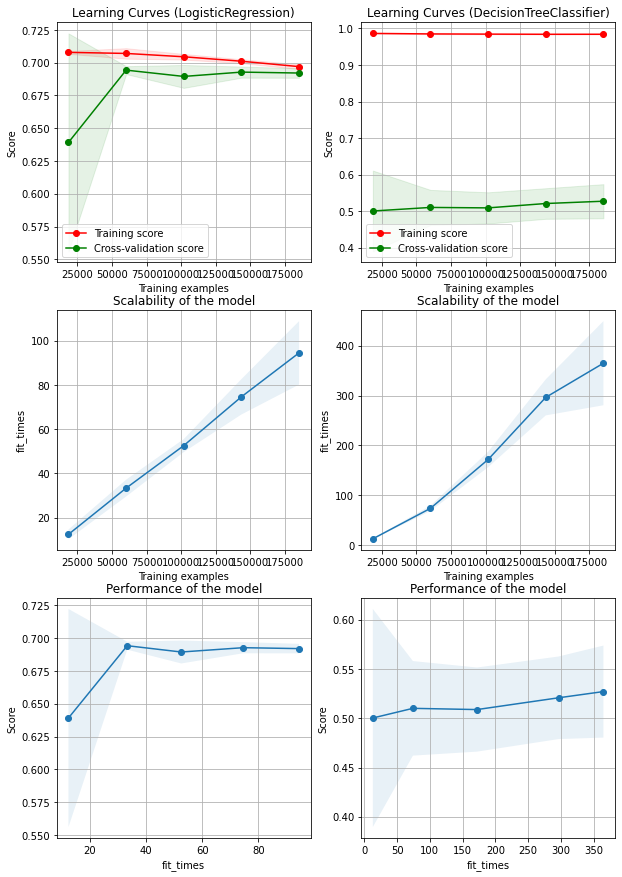

In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = split(feature_engineering(import_data(small= small_size)))

title = "Learning Curves (LogisticRegression)"
cv = StratifiedKFold(n_splits= 5)

estimator = build_pipeline(LogisticRegression(class_weight= 'balanced'))
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0],
                    cv=cv, n_jobs= -1)

title = r"Learning Curves (DecisionTreeClassifier)"
cv = StratifiedKFold(n_splits= 5)

estimator = build_pipeline(DecisionTreeClassifier(class_weight= 'balanced'))
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1],
                    cv=cv, n_jobs= -1)

plt.show()

**6. Para cada modelo aplique uma combinação aos hiperparâmetros com o GridSearch e aplique também o CrossValidation (2,0 pontos)**
  * P.S.: Explique, com suas palavras, a necessidade de utilizar GridSearch e CrossValidation
  * P.S.: Explique a importância de no mínimo um hiperparâmetro para cada modelo

**Respostas:** Na avaliação dos modelos é importante utilizarmos o GridSearch e o CrossValidation para que seja realizado um treino adequado do modelo e para serem testados os diversos valores de hiper-parâmetros.

Para atingir isso, é necessário separar uma parte dos dados para que seja validado o treino realizado com o modelo. Pode ocorrer então que, ao pegar aleatóriamente dados do conjunto, a separação resulte em um resultado melhor do que o encontrado em outro conjunto de dados aleatórios. Desta forma, a fim de evitar essa "sorte" utilizamos a **Validação Cruzada** (CrossValidation). A validação cruzada divide o conjunto de dados completo em conjuntos e o modelo é treinado para cada um deles tendo como resultado o valor médio das execuções. Desta forma, mesmo que ocorra alguma "sorte" na separação de algum conjunto visualizaremos também o resultados dos outros conjuntos.

Além disso, para aprimorar os modelos podemos usar o **GridSearch**. O GridSearch será responsável por executar o treino do modelo de forma iterativa testando a grade de hiper-parâmetros que foi passada a ele, desta forma podemos, de forma automatizada, realizar diversas execuções e armazenar seus resultados.

# LogisticRegression

In [61]:
LRparam_grid = {
    'clf__estimator__C': [10, 100],
    'clf__estimator__penalty': ['l2'],
    'clf__estimator__max_iter': [500, 800]
}

cv = StratifiedKFold(n_splits= 3)

scoring_list = ['accuracy', 'f1_weighted']

X, y = split(feature_engineering(import_data(small= small_size)))

pipeline = build_pipeline(LogisticRegression(class_weight= 'balanced'))

grid_cv = GridSearchCV(
    estimator= pipeline,
    param_grid= LRparam_grid,
    scoring= scoring_list,
    n_jobs= -1,
    refit= 'f1_weighted',
    cv= cv
)

In [62]:
grid_cv.fit(X, y)

D:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Programas\Anaconda3\lib\site-packages\sklea

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('data',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['precinct',
                                                                          'sector']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['priority',
                                                                          'call_month',
                                                                          'call_day',
                                                                          'call_hour',
               

In [63]:
pd.DataFrame.from_dict(grid_cv.cv_results_).sort_values('rank_test_f1_weighted')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1     487.349336      5.173393        13.268666        0.657588   
2     402.280334      4.552020        24.167335        0.586334   
3     504.237001      1.448234        11.067015        0.152729   
0     403.358002      6.199016        24.135667        0.519937   

  param_clf__estimator__C param_clf__estimator__max_iter  \
1                      10                            800   
2                     100                            500   
3                     100                            800   
0                      10                            500   

  param_clf__estimator__penalty  \
1                            l2   
2                            l2   
3                            l2   
0                            l2   

                                              params  split0_test_accuracy  \
1  {'clf__estimator__C': 10, 'clf__estimator__max...              0.698717   
2  {'clf__estimator__C': 100, 'clf__estimator__ma...              0.699326   
3  {'clf__estimator__C': 100, 'clf__estimator__ma...              0.699118   
0  {'clf__estimator__C': 10, 'clf__estimator__max...              0.698393   

   split1_test_accuracy  split2_test_accuracy  mean_test_accuracy  \
1              0.685883              0.692429            0.692343   
2              0.684003              0.692766            0.692032   
3              0.684872              0.692663            0.692218   
0              0.685286              0.692507            0.692062   

   std_test_accuracy  rank_test_accuracy  split0_test_f1_weighted  \
1           0.005240                   1                 0.698465   
2           0.006277                   4                 0.699197   
3           0.005825                   2                 0.699063   
0           0.005360                   3                 0.698135   

   split1_test_f1_weighted  split2_test_f1_weighted  mean_test_f1_weighted  \
1                 0.685005                 0.696687               0.693386   
2                 0.683773                 0.696997               0.693322   
3                 0.683568                 0.696933               0.693188   
0                 0.684638                 0.696742               0.693171   

   std_test_f1_weighted  rank_test_f1_weighted  
1              0.005971                      1  
2              0.006812                      2  
3              0.006858                      3  
0              0.006061                      4

In [64]:
grid_cv.best_params_

{'clf__estimator__C': 10,
 'clf__estimator__max_iter': 800,
 'clf__estimator__penalty': 'l2'}

# DecisionTreeClassifier

In [65]:
DTparam_grid = {
    'clf__estimator__max_depth': [10, 100, 500],
    'clf__estimator__min_samples_leaf': [100, 500]
}


cv = StratifiedKFold(n_splits= 3)

scoring_list = ['accuracy', 'f1_weighted']

X, y = split(feature_engineering(import_data(small= small_size)))

pipeline = build_pipeline(DecisionTreeClassifier(class_weight= 'balanced'))

grid_cv2 = GridSearchCV(
    estimator= pipeline,
    param_grid= DTparam_grid,
    scoring= scoring_list,
    n_jobs= -1,
    refit= 'f1_weighted',
    cv= cv
)

In [66]:
grid_cv2.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('data',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['precinct',
                                                                          'sector']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['priority',
                                                                          'call_month',
                                                                          'call_day',
                                                                          'call_hour',
               

In [67]:
pd.DataFrame.from_dict(grid_cv2.cv_results_).sort_values('rank_test_f1_weighted')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3     129.996668      2.328769        26.040331        1.494198   
5      70.443667      0.383907        14.172666        0.402618   
4      96.126995      2.144596        10.959688        0.500511   
2     159.695664      5.706156        20.516000        1.338453   
1     109.125676      4.740277        25.176664        1.835435   
0     113.157320      5.849343        26.157662        1.470234   

  param_clf__estimator__max_depth param_clf__estimator__min_samples_leaf  \
3                             100                                    500   
5                             500                                    500   
4                             500                                    100   
2                             100                                    100   
1                              10                                    500   
0                              10                                    100   

                                              params  split0_test_accuracy  \
3  {'clf__estimator__max_depth': 100, 'clf__estim...              0.682072   
5  {'clf__estimator__max_depth': 500, 'clf__estim...              0.682072   
4  {'clf__estimator__max_depth': 500, 'clf__estim...              0.672880   
2  {'clf__estimator__max_depth': 100, 'clf__estim...              0.672777   
1  {'clf__estimator__max_depth': 10, 'clf__estima...              0.657467   
0  {'clf__estimator__max_depth': 10, 'clf__estima...              0.650337   

   split1_test_accuracy  split2_test_accuracy  mean_test_accuracy  \
3              0.607934              0.680827            0.656944   
5              0.607921              0.680827            0.656940   
4              0.600506              0.679103            0.650830   
2              0.600506              0.679090            0.650791   
1              0.593674              0.663871            0.638337   
0              0.600583              0.661486            0.637469   

   std_test_accuracy  rank_test_accuracy  split0_test_f1_weighted  \
3           0.034659                   1                 0.687394   
5           0.034665                   2                 0.687394   
4           0.035675                   3                 0.679460   
2           0.035650                   4                 0.679372   
1           0.031690                   5                 0.665160   
0           0.026476                   6                 0.658632   

   split1_test_f1_weighted  split2_test_f1_weighted  mean_test_f1_weighted  \
3                 0.606544                 0.688647               0.660862   
5                 0.606529                 0.688647               0.660857   
4                 0.580679                 0.687387               0.649175   
2                 0.580683                 0.687374               0.649143   
1                 0.593074                 0.674386               0.644207   
0                 0.599247                 0.672256               0.643378   

   std_test_f1_weighted  rank_test_f1_weighted  
3              0.038412                      1  
5              0.038419                      2  
4              0.048542                      3  
2              0.048519                      4  
1              0.036352                      5  
0              0.031697                      6

**7. Defina uma métrica de avaliação e avalie as soluções candidatas. Justifique a escolha da sua métrica. (1,0 ponto)**

Nossa metrica escolhida entra as candidatas foi a **F1-Score**. Com a **F1-Score** temos uma visão mais abrangente do modelo pois com ela temos como ter uma ideia geral do desempenho do modelo tanto com a precisão quanto ao recall evitando assim uma analise apenas em uma métrica direta.

A **F1-Score** derida da fórmula: F1 = 2 * (precision * recall) / (precision + recall).

In [68]:
def cross_validade_model(classifier):
    pipeline = build_pipeline(classifier)

    X, y = split(feature_engineering(import_data(small= small_size)))

    skf = StratifiedKFold(n_splits= 5)

    scoring_list = ['accuracy', 'f1_weighted']

    scores = cross_validate(pipeline, X, y, cv= skf, scoring= scoring_list, n_jobs= -1)
    
    return scores

In [69]:
fit = {}

classifier_list = [LogisticRegression(class_weight= 'balanced'), DecisionTreeClassifier(class_weight= 'balanced')]#, RandomForestClassifier(), KNeighborsClassifier()]

for classifier in classifier_list:
    scores = cross_validade_model(classifier)
    fit[str(classifier)] = pd.DataFrame.from_dict(scores).mean().to_dict()
    
model_fit_result = pd.DataFrame.from_dict(fit)

In [70]:
model_fit_result

LogisticRegression(class_weight='balanced')  \
fit_time                                            67.294996   
score_time                                           7.617425   
test_accuracy                                        0.692062   
test_f1_weighted                                     0.692078   

                  DecisionTreeClassifier(class_weight='balanced')  
fit_time                                               209.552598  
score_time                                               6.919413  
test_accuracy                                            0.528554  
test_f1_weighted                                         0.532333

Como observado na Tabela, o algoritmo de **Regressão Logistica** apresentou melhor resultado na métrica F1-Score, logo esse será o modelo escolhido.

**8. Escolha um dos modelos, por exemplo o melhor modelo, e faça uma análise do overfitting e underfitting. Justique sua resposta com base em experimentos. (1,5 pontos)**
   * Analise no mínimo 2 hiperparâmetros e também o número de amostras utilizado no treinamento
   * Utilize recursos visuais, por exemplo gráficos, se você achar neccessário

### Parâmetro - C

In [71]:
param_range = [0.0001, 0.01, 0.5, 1]
pipeline = build_pipeline(LogisticRegression(class_weight= 'balanced'))
X, y = split(feature_engineering(import_data(small= small_size)))

train_scores, test_scores = validation_curve(
    estimator= pipeline,
    X= X,
    y= y,
    param_name= 'clf__estimator__C',
    param_range= param_range,
    scoring= "f1_weighted",
    n_jobs= -1)

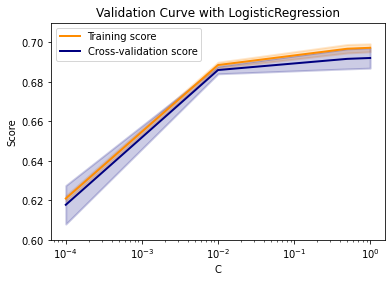

In [72]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with LogisticRegression")
plt.xlabel('C')
plt.ylabel("Score")
plt.ylim(0.6, 0.71)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Parâmetro - Max_Iter

In [73]:
param_range = [5, 10, 20, 50]
pipeline = build_pipeline(LogisticRegression(class_weight= 'balanced'))
X, y = split(feature_engineering(import_data(small= small_size)))

train_scores2, test_scores2 = validation_curve(
    estimator= pipeline,
    X= X,
    y= y,
    param_name= 'clf__estimator__max_iter',
    param_range= param_range,
    scoring= "f1_weighted",
    n_jobs= -1)

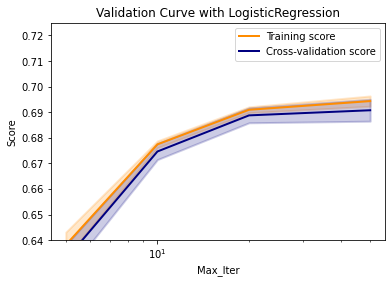

In [74]:
train_scores_mean = np.mean(train_scores2, axis=1)
train_scores_std = np.std(train_scores2, axis=1)
test_scores_mean = np.mean(test_scores2, axis=1)
test_scores_std = np.std(test_scores2, axis=1)

plt.title("Validation Curve with LogisticRegression")
plt.xlabel('Max_Iter')
plt.ylabel("Score")
plt.ylim(0.64, 0.725)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

**9. Realize a predição sobre os dados test_call_data.csv, disponibilizado a parte do arquivo Call_Data.csv, como o seu modelo saiu? (1,0 ponto)**

#### Retreinando modelo final com todos os dados

In [75]:
X, y = split(feature_engineering(import_data(small= small_size)))

pipeline = build_pipeline(
    LogisticRegression(
        C= 100,
        max_iter= 500,
        penalty= 'l2',
        class_weight= 'balanced'
    ))

pipeline.fit(X, y)

D:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Programas\Anaconda3\lib\site-packages\sklea

Pipeline(steps=[('data',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['precinct', 'sector']),
                                                 ('num', MinMaxScaler(),
                                                  ['priority', 'call_month',
                                                   'call_day', 'call_hour',
                                                   'call_dayofweek',
                                                   'call_weekofyear',
                                                   'hours_to_arrive',
                                                   'hours_to_arrive_fix',
                                                   'call_type_onview',
                                                   'call_type_not_911',
                                                   'call_type_911',
                                                   'call_type_others']),
                                 

#### Feature Engineering aplicado a base test_call_data
(Aplicando o mesmo que foi feito no de Treino/Teste)

In [76]:
def feature_engineering_test(df, list_beats, top_call_type, time_arrive_mean, label_encod):
    # Corrigindo valores das colunas Precinct e Sector
    for i in range(list_beats.shape[0]):
        df.loc[df.Beat.isin(list_beats.iloc[i,:].Beat), 'Precinct'] = list_beats.iloc[i,:].Precinct
        df.loc[df.Beat.isin(list_beats.iloc[i,:].Beat), 'Sector'] = list_beats.iloc[i,:].Sector
    
    # Filtrando dados UNKNOWN
    df = df[df['Precinct'] != 'UNKNOWN']
    
    # Categorizando Call Type
    for col in top_call_type:
        df['Call Type ' + col] = (df['Call Type'] == col).astype(int)

    df['Call Type Others'] = (~df['Call Type'].isin(top_call_type)).astype(int)
    
    del df['Call Type']
    
    # Corrigindo variável de tempo de chegada
    df['Time to Arrive Hours Fix'] = df['Time to Arrive Hours']

    for id_priority in df[df['Time to Arrive Hours'] < 0]['Priority'].unique():
        df.loc[(df['Time to Arrive Hours'] < 0) & (df['Priority'] == id_priority), 'Time to Arrive Hours Fix'] = time_arrive_mean.loc[id_priority]

    df.loc[(df['Time to Arrive Hours'] < 0), 'Time to Arrive Hours'] = 0
    
    del df['Original Time Queued'], df['Arrived Time']
    
    # Deletando informação do Futuro
    del df['Final Call Type']
    
    # Deletando coluna não utilizada
    del df['Beat']
    
    # Label Encode Target
    df['Event Clearance Description'] = label_encod.fit_transform(df['Event Clearance Description'])

    #print(dict(zip(label_encod.classes_, label_encod.transform(label_encod.classes_))))
    
    # Renomeando as colunas
    df.columns = [
        'event_id', 'target', 'priority', 'initial_call_type', 'precinct', 'sector',
        'call_month', 'call_day', 'call_hour', 'call_dayofweek', 'call_weekofyear',
        'hours_to_arrive',
        'call_type_onview', 'call_type_not_911', 'call_type_911', 'call_type_others', 'hours_to_arrive_fix'
    ]
    
    # Trocando ordem das colunas
    df = df[[
        'event_id', 'target', 'priority', 'initial_call_type', 'precinct', 'sector',
        'call_month', 'call_day', 'call_hour', 'call_dayofweek', 'call_weekofyear',
        'hours_to_arrive', 'hours_to_arrive_fix',
        'call_type_onview', 'call_type_not_911', 'call_type_911', 'call_type_others'
    ]]
    
    #del df['initial_call_type']
    
    return df

In [77]:
(_, list_beats, top_call_type, time_arrive_mean, label_encod
) = feature_engineering(import_data(small= small_size), returned= False)

# Predicted Results
test_call_pred = pipeline.predict(
    feature_engineering_test(
        df= import_data(small= 'teste'),
        list_beats= list_beats,
        top_call_type= top_call_type,
        time_arrive_mean= time_arrive_mean,
        label_encod= label_encod
).drop(columns= ['event_id', 'target']))

# True Results
y_true = feature_engineering_test(
        df= import_data(small= 'teste'),
        list_beats= list_beats,
        top_call_type= top_call_type,
        time_arrive_mean= time_arrive_mean,
        label_encod= label_encod
)['target'].to_list()

f1_score(y_true, test_call_pred, average='weighted')

0.6915967603941364

Embora levemente abaixo, o **F1-Score** se manteve bem próximo ao observado no Treino/Teste (0.70)

**10. Se seu modelo permitir analisar a importância das features, analise-o e tente justificar de forma subjetiva a importância das features. Por exemplo, a feature chamadas_a_noite possui um alto coeficiente, pois há uma tendência dos crimes acontecerem a noite, não tão simples assim :P. (1,0 ponto)**

 **11. Aplique clusterização, preferencialmente o KMeans sobre o dado, e comunique suas novas descobertas, sinta-se a vontade para apresentar uma solução com recursos visuais (2,0 pontos)**

# Bom trabalho!

In [80]:
# Exportando arquivo
!jupyter nbconvert --to html Prova.ipynb

[NbConvertApp] Converting notebook Prova.ipynb to html
[NbConvertApp] Writing 4226218 bytes to Prova.html
